In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 


Matplotlib is building the font cache; this may take a moment.


In [2]:
# show plots inline
%matplotlib inline

# set seaborn style
sns.set(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv("train.csv")

# Display the first few rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Data Overview/Exploration
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data Cleaning and Preprocessing


In [5]:
# Handle missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

# fill missing values with the mean for numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)  
# fill missing values with the mode for categorical columns
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
# Check for duplicates
df.drop_duplicates(inplace=True)

Missing values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13168\1655445976.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13168\1655445976.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


Get The Descriptive statistics

In [7]:
# Numerical stats
num_stats = df.describe()

# Categorical stats
cat_stats = df.describe(include=[object])

# Display the descriptive statistics and categorical statistics
num_stats, cat_stats

(                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
 count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
 mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
 std     421.610009    42.300571    22.024023    9981.264932     1.382997   
 min       1.000000    20.000000    21.000000    1300.000000     1.000000   
 25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
 50%     730.500000    50.000000    70.049958    9478.500000     6.000000   
 75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
 max    1460.000000   190.000000   313.000000  215245.000000    10.000000   
 
        OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
 count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
 mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
 std       1.112799    30.202904     20.645407   180.569112   

Data Visualization

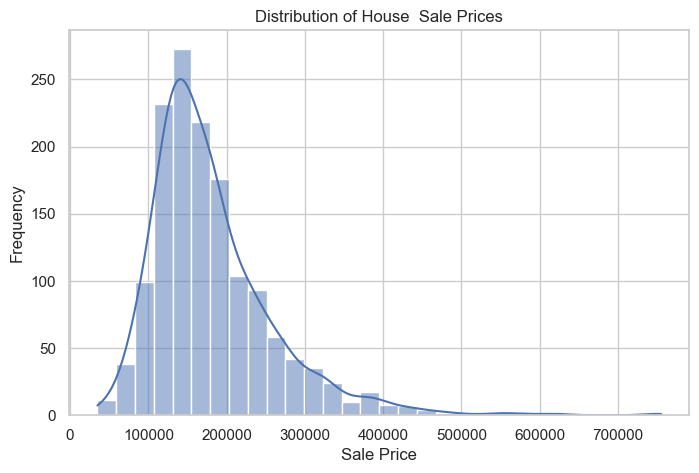

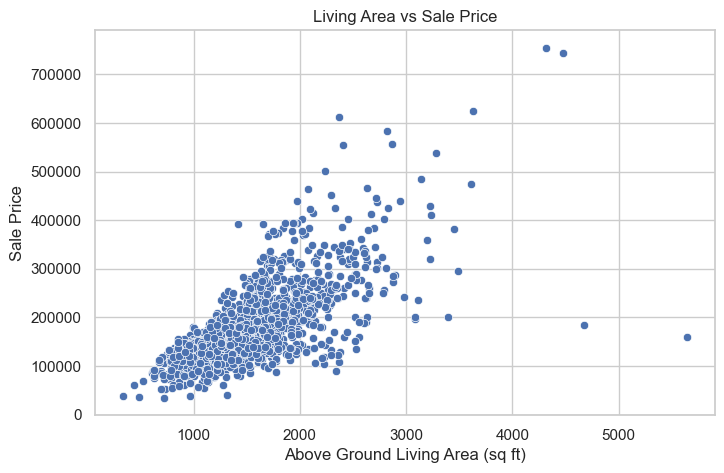

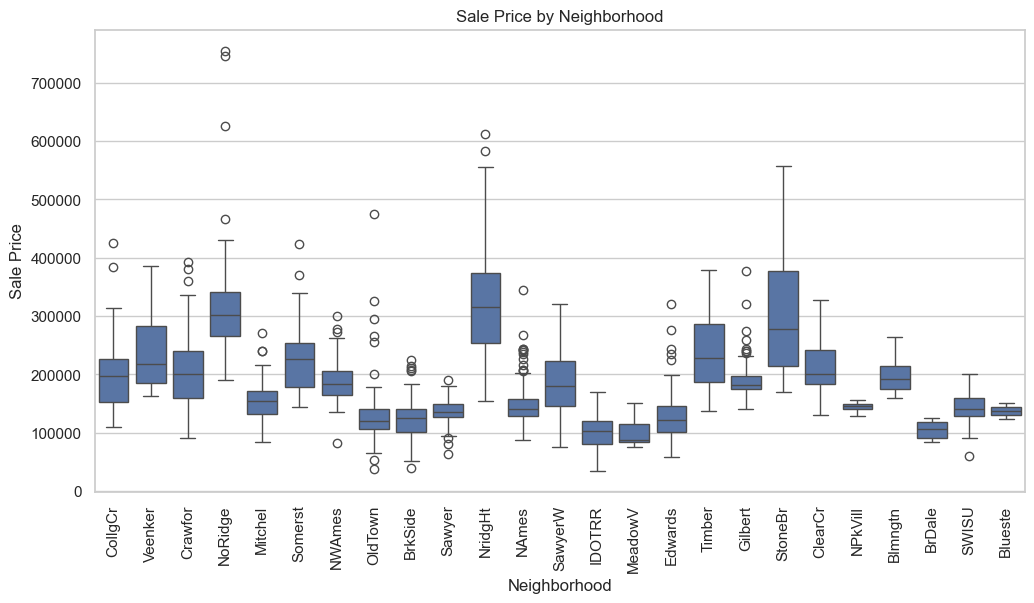

In [8]:
# Histogram of SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of House  Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

# Box plot of SalePrice by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()


Hypothesis testing

In [9]:
# T-test for Saleprice between houses with and without Central Air Conditioning
central_air_prices = df[df['CentralAir'] == 'Y']['SalePrice']
no_central_air_prices = df[df['CentralAir'] == 'N']['SalePrice']

t_stat, p_val = stats.ttest_ind(central_air_prices, no_central_air_prices)
print(f"T-test: t-statistics = {t_stat:.2f}, p-value = {p_val:.4f}")

# Example 2: Chi-square test between Neighborhood and Central Air Conditioning
contingency_table = pd.crosstab(df['Neighborhood'], df['CentralAir'])
chi2, chi_p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test: chi2 = {chi2:2f}, p-value = {chi_p:.4f}")

T-test: t-statistics = 9.91, p-value = 0.0000
Chi-square test: chi2 = 237.084478, p-value = 0.0000


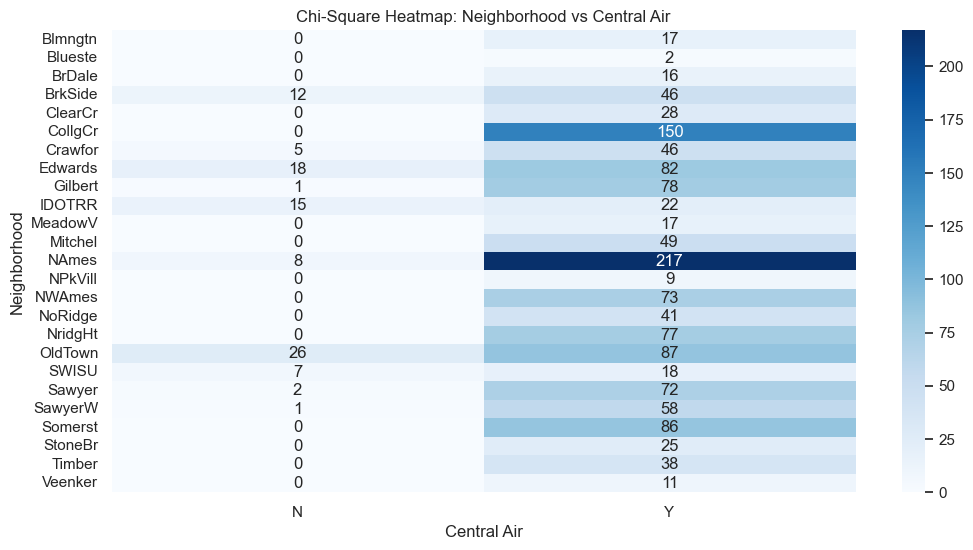

In [10]:
crosstab = pd.crosstab(df['Neighborhood'], df['CentralAir'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Chi-Square Heatmap: Neighborhood vs Central Air')
plt.ylabel('Neighborhood')
plt.xlabel('Central Air')
plt.show()

1. T-test: t-statistic = 9.91, p-value = 0.0000
Purpose:
A t-test compares the average sale price of two groups—in this case:

Houses with Central Air (CentralAir = Y)

Houses without Central Air (CentralAir = N)

What the numbers mean:

t-statistic = 9.91 → This is how many standard errors apart the two group means are. A higher absolute value means a bigger difference.

p-value = 0.0000 → This is the probability that you would see such a big difference if there was no real difference in the population (null hypothesis). Here, the value is effectively 0 (less than 0.0001), meaning the difference is extremely unlikely to be due to chance.

Conclusion:
Houses with Central Air tend to have a significantly higher average price than those without.

2. Chi-square test: chi2 = 237.08, p-value = 0.0000
Purpose:
A chi-square test checks if there is a relationship between two categorical variables—in this case:

Neighborhood

Central Air (Y/N)

What the numbers mean:

chi2 = 237.08 → This measures how much the observed frequencies differ from what would be expected if there was no relationship. The higher the value, the more evidence of a relationship.

p-value = 0.0000 → Again, effectively 0, meaning the observed pattern is very unlikely to occur if the two variables were unrelated.

Conclusion:
There is a strong association between neighborhood and whether a house has Central Air Conditioning—some neighborhoods have it almost always, while others rarely do.